In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import choice
%matplotlib inline


### Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

### Now we will try to check the normality of the numerical variables visually
#### Use seaborn library to construct distribution plots for the numerical variables
#### Use Matplotlib to construct histograms.
#### Do the distributions for different numerical variables look like a normal distribution?

### For the numerical variables, check the multicollinearity between the input features. multicollinearity does not include the target feature.

### Plot the Correlation Heatmap.

### (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.


In [262]:
file=pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round3.csv")

In [263]:
df=pd.DataFrame(file)

In [264]:
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [265]:
cats=df.select_dtypes(include="object")

In [266]:
nums=df.select_dtypes(include="number")

In [267]:
nums

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [268]:
cats

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [269]:
def sns_hist_plot(df):
    colors=["coral","red","chocolate","bisque","gold","yellowgreen",
            "lawngreen","lightgreen","darkgreen","cyan","dodgerblue",
            "royalblue","mediumpurple","darkviolet","magenta","deeppink","pink"]
    col_num=len(list(df.columns))
    if col_num<4:
        fig1, axes = plt.subplots(1,col_num,figsize=(5*col_num,6))
    else:
        fig1, axes = plt.subplots(int(np.ceil(col_num/4)),4,figsize=(16,1.2*col_num))
    sns.set(style="darkgrid")
    for i,column in enumerate(df.columns):
        if col_num<=4:
            fig1=sns.histplot(x=column, kde=True, data=df, ax=axes[0,i],color=colors[i])
        else:
            fig1=sns.histplot(x=column, kde=True, data=df, ax=axes[int(np.ceil(i/4))-1,i%4],color=colors[i])
    return fig1



<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

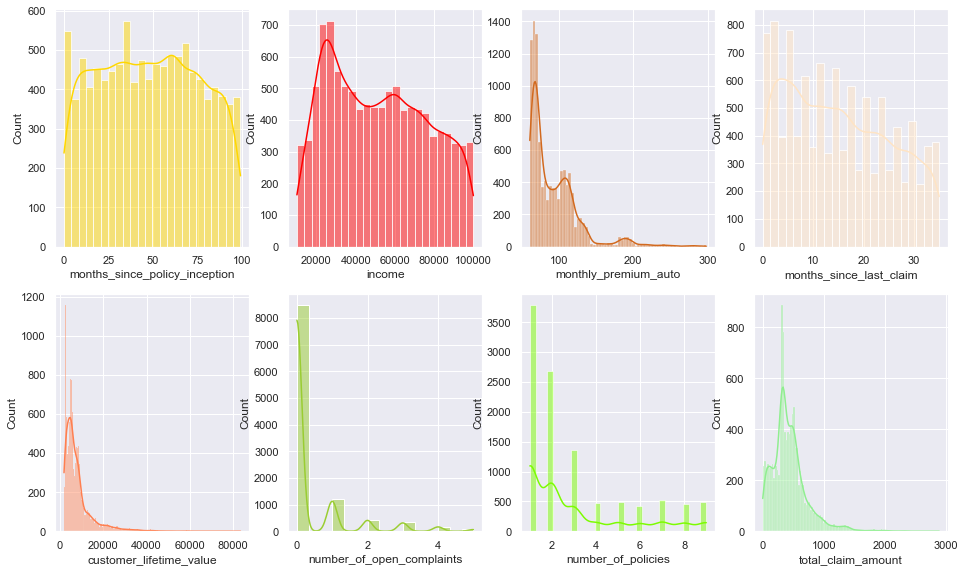

In [270]:
sns_hist_plot(nums)

###### Use seaborn library to construct distribution plots for the numerical variables

In [271]:
"""
fig1, axes = plt.subplots(2,4,figsize=(16,10))

sns.set(style="darkgrid")

sns.histplot(x='customer_lifetime_value', kde=True, data = nums, ax = axes[0,0],color="teal")
sns.histplot(x='income', kde=True, data = nums, ax = axes[0,1],color="olive")
sns.histplot(x='monthly_premium_auto', kde=True, data = nums, ax = axes[0,2],color="skyblue")
sns.histplot(x="months_since_last_claim", kde=True,data=nums,ax=axes[0,3],color="red")

sns.histplot(x='months_since_policy_inception', kde=True, data = nums, ax = axes[1,0],color="gold")
sns.histplot(x='number_of_open_complaints', kde=True, data = nums, ax = axes[1,1],color="red")
sns.histplot(x='number_of_policies', kde=True, data = nums, ax = axes[1,2],color="red")
sns.histplot(x='total_claim_amount', kde=True, data = nums, ax = axes[1,3],color="red")
"""

'\nfig1, axes = plt.subplots(2,4,figsize=(16,10))\n\nsns.set(style="darkgrid")\n\nsns.histplot(x=\'customer_lifetime_value\', kde=True, data = nums, ax = axes[0,0],color="teal")\nsns.histplot(x=\'income\', kde=True, data = nums, ax = axes[0,1],color="olive")\nsns.histplot(x=\'monthly_premium_auto\', kde=True, data = nums, ax = axes[0,2],color="skyblue")\nsns.histplot(x="months_since_last_claim", kde=True,data=nums,ax=axes[0,3],color="red")\n\nsns.histplot(x=\'months_since_policy_inception\', kde=True, data = nums, ax = axes[1,0],color="gold")\nsns.histplot(x=\'number_of_open_complaints\', kde=True, data = nums, ax = axes[1,1],color="red")\nsns.histplot(x=\'number_of_policies\', kde=True, data = nums, ax = axes[1,2],color="red")\nsns.histplot(x=\'total_claim_amount\', kde=True, data = nums, ax = axes[1,3],color="red")\n'

###### Use Matplotlib to construct histograms.

meaning do the same thing as above, just with matplotlib

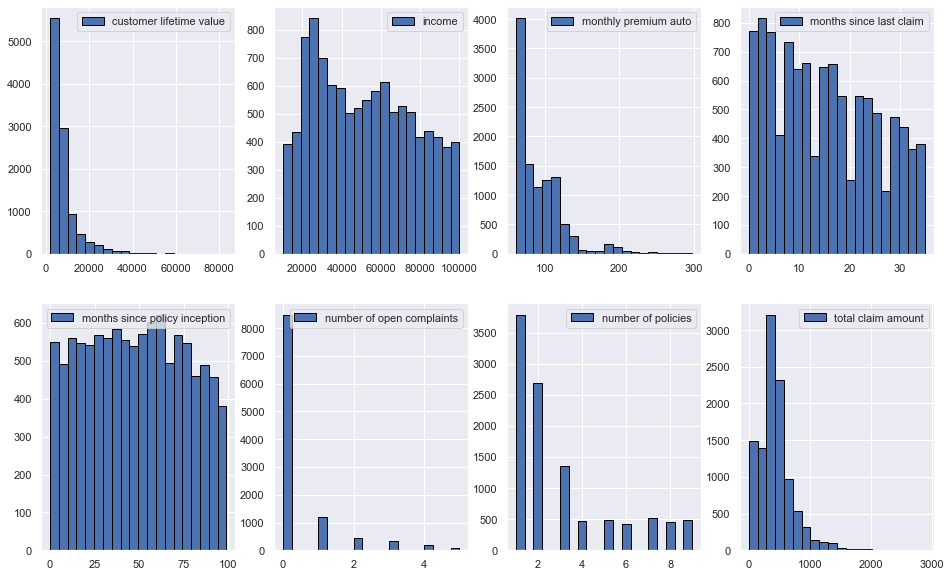

In [272]:
fig2, axes2 = plt.subplots(2,4,figsize = (16,10))


axes2[0,0].hist(nums['customer_lifetime_value'],bins=20,edgecolor='black',label="customer lifetime value")
axes2[0,1].hist(nums['income'],bins=20,edgecolor='black',label="income")
axes2[0,2].hist(nums['monthly_premium_auto'],bins=20,edgecolor='black',label="monthly premium auto")
axes2[0,3].hist(nums['months_since_last_claim'],bins=20,edgecolor='black',label="months since last claim")

axes2[1,0].hist(nums['months_since_policy_inception'],bins=20,edgecolor='black',label="months since policy inception")
axes2[1,1].hist(nums['number_of_open_complaints'],bins=20,edgecolor='black',label="number of open complaints")
axes2[1,2].hist(nums['number_of_policies'],bins=20,edgecolor='black',label="number of policies")
axes2[1,3].hist(nums['total_claim_amount'],bins=20,edgecolor='black',label="total claim amount")

for a in range(2):
    for b in range(4):
        axes2[a,b].legend()

###### Question: Do the distributions for different numerical variables look like a normal distribution?

To me, the only distribution that looks like a normal distribution is the customer lifetime value. It has a pretty long "tail" to the right, though.

###### For the numerical variables, check the multicollinearity between the input features. multicollinearity does not include the target feature.

<AxesSubplot:>

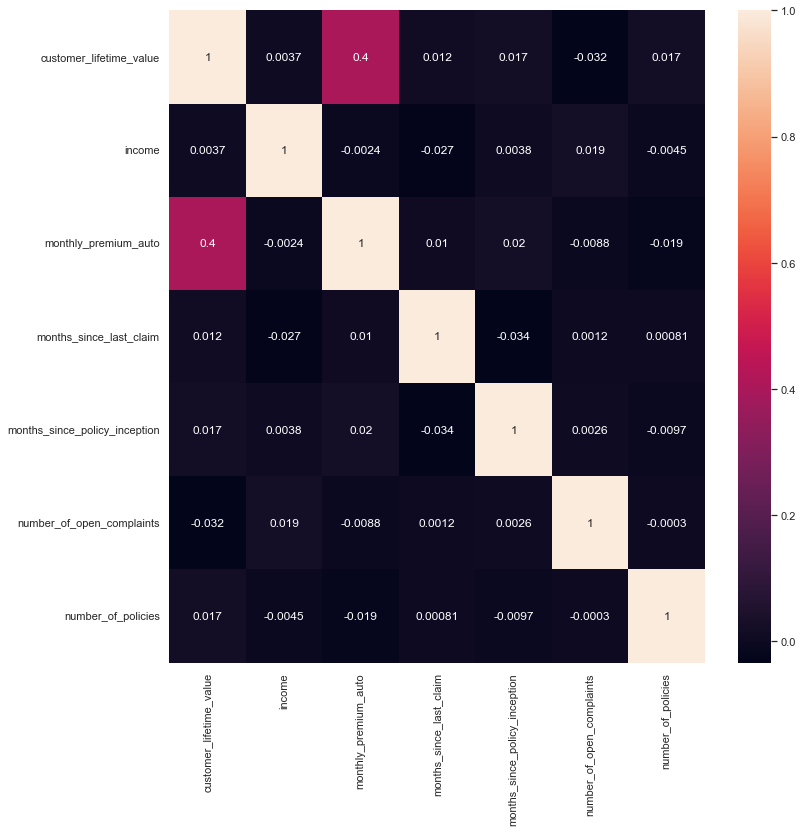

In [273]:
heater=plt.figure(figsize=(12,12))
sns.heatmap(nums.drop("total_claim_amount",axis=1).corr(),annot=True)

Based on this heat map it seems there are none of the independent variables that are strongly correlated (meaning more than 0,9 correlation). Therefore I will not be deleting any of the columns.

# It's Thursday. Big hype 

###### Show a plot of the total number of responses.

###### Show a plot of the response by the sales channel.

###### Show a plot of the response by the total claim amount.

###### Show a plot of the response by income.

###### (Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.

###### Clean your notebook and make it a readable and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

([<matplotlib.patches.Wedge at 0x7fd773f4dbe0>,
 [Text(-1.0116456747387677, 0.43194100150639075, 'no'),
  Text(1.011645694959384, -0.4319409541478385, 'yes')])

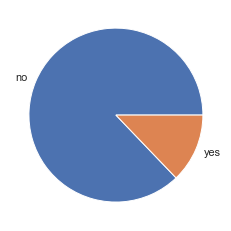

In [274]:
plt.pie(cats['response'].value_counts(),
       labels=["no","yes"])


In [275]:
cats["responded"]=cats["response"]
df["responded"]=df["response"]

In [276]:
sales_response= cats.groupby(['sales_channel',"responded"])['response'].count().reset_index()
sales_response

,sales_channel,responded,response
0,agent,no,3340
1,agent,yes,679
2,branch,no,2665
3,branch,yes,310
4,call center,no,1890
5,call center,yes,209
6,web,no,1421
7,web,yes,175


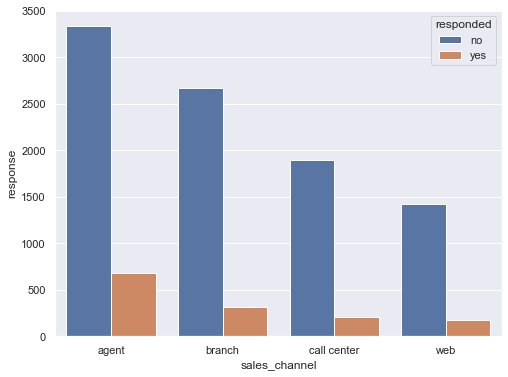

In [277]:
plt.figure(figsize=(8,6))
plt.subplot()

sns.barplot(x=sales_response['sales_channel'],y=sales_response["response"],hue = sales_response['responded'])
cats=cats.drop("responded",axis=1)

In [278]:
df["rounded_claim_amount"]=df["total_claim_amount"].apply(round,ndigits=-2)                                                         
                                                        
claim_amount_response = df.groupby(['rounded_claim_amount','responded'])['response'].count().reset_index()
claim_amount_response


,rounded_claim_amount,responded,response
0,0,no,500
1,0,yes,30
2,100,no,912
3,100,yes,90
4,200,no,885
5,200,yes,78
6,300,no,1923
7,300,yes,300
8,400,no,1386
9,400,yes,242


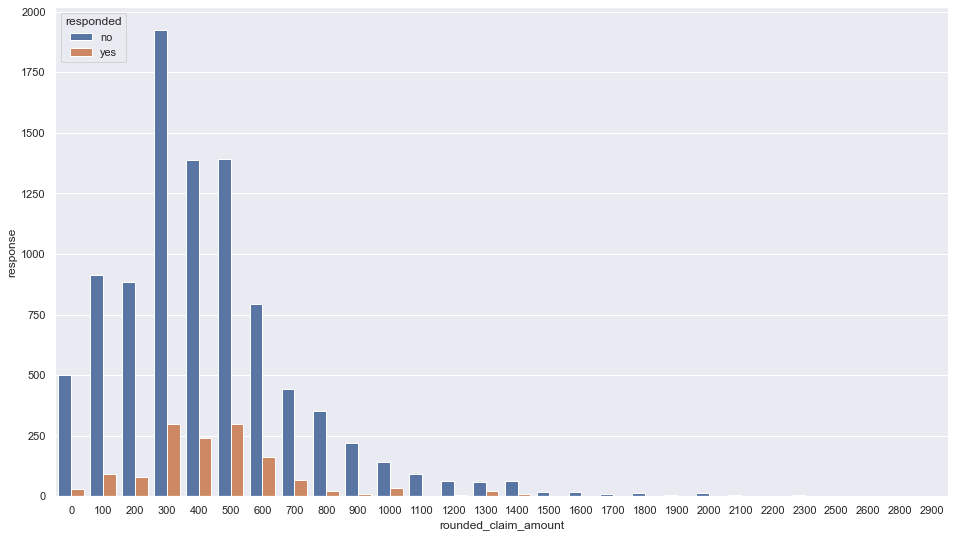

In [279]:
plt.figure(figsize=(16,9))
plt.subplot()

sns.barplot(x=claim_amount_response['rounded_claim_amount'],y=claim_amount_response["response"],hue = claim_amount_response['responded'])
df=df.drop("rounded_claim_amount",axis=1)


In [280]:
df["rounded_income"]=df["income"].apply(round,ndigits=-4)
df["rounded_income2"]=df["income"].apply(round,ndigits=-4)

income_response = df.groupby(['rounded_income','responded'])['response'].count().reset_index()
income_response2 = df.groupby(['rounded_income2','responded'])['response'].count().reset_index()
income_response

,rounded_income,responded,response
0,10000,no,325
1,10000,yes,102
2,20000,no,1198
3,20000,yes,241
4,30000,no,1399
5,30000,yes,200
6,40000,no,1117
7,40000,yes,166
8,50000,no,1048
9,50000,yes,109


<AxesSubplot:xlabel='rounded_income', ylabel='response'>

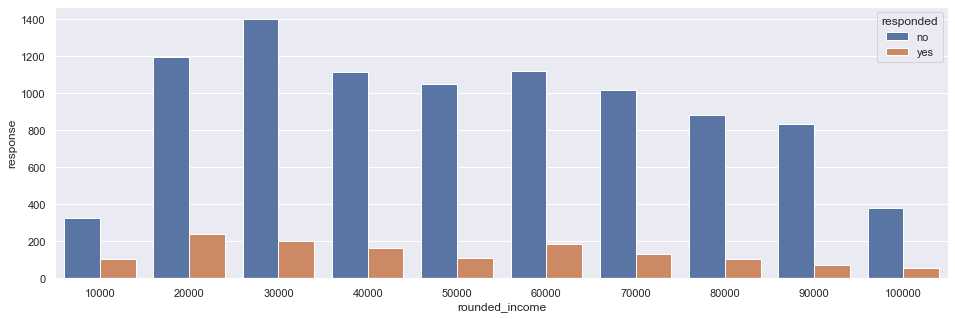

In [281]:
plt.figure(figsize=(16,5))
plt.subplot()

sns.barplot(x=income_response['rounded_income'],y=income_response["response"],hue = claim_amount_response['responded'])


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '10000'),
  Text(1, 0, '20000'),
  Text(2, 0, '30000'),
  Text(3, 0, '40000'),
  Text(4, 0, '50000'),
  Text(5, 0, '60000'),
  Text(6, 0, '70000'),
  Text(7, 0, '80000'),
  Text(8, 0, '90000'),
  Text(9, 0, '100000')])

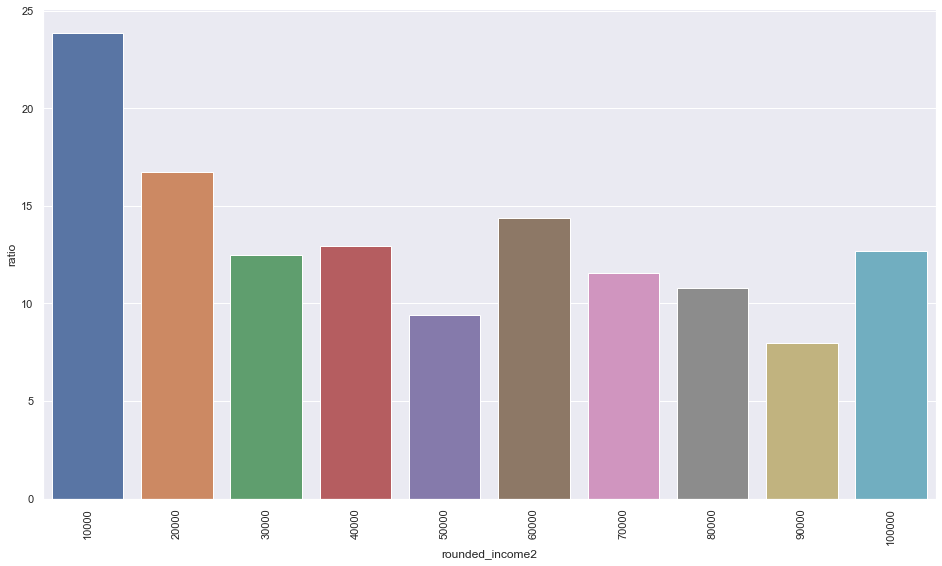

In [286]:
test_filtered = df.groupby(['rounded_income2','responded'])['response'].count().reset_index()
test_total=df.groupby(['rounded_income2'])['response'].count().reset_index()

yes_list=[]
for i,res in enumerate(test_filtered["responded"]):
    if res=="yes":
        yes_list.append(test_filtered.iloc[i,2])
    else:
        continue

test_total["num_of_yes"]=yes_list
test_total["ratio"]=(test_total["num_of_yes"]/test_total["response"])*100


plt.figure(figsize=(16,9))
plt.subplot()

sns.barplot(x=test_total['rounded_income2'],y=test_total["ratio"])
plt.xticks(rotation=90)


In [ ]:
#df=df.drop("responded",axis=1)
#df=df.drop("rounded_income",axis=1)